<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/HeartbeatClassificatio_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

任务说明：根据给定的数据集，建立模型，预测不同的心跳信号。<br>
预测心电图心跳信号类别为任务，数据集报名后可见并可下载，该该数据来自某平台心电图数据记录，总数据量超过20万，主要为1列心跳信号序列数据，其中每个样本的信号序列采样频次一致，长度相等。为了保证比赛的公平性，将会从中抽取10万条作为训练集，2万条作为测试集A，2万条作为测试集B，同时会对心跳信号类别（label）信息进行脱敏。
+ 准确率（Accuracy）
$$ Accuracy=\frac{Correct}{Total}\  Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$ 

+ 精确率(Precision)是针对预测结果而言的，其含义是在被所有预测为正的样本中实际为正样本的概率
$$ Precision = \frac{TP}{TP + FP} $$ 

+ 召回率(Recall)是针对原样本而言的，其含义是在实际为正的样本中被预测为正样本的概率。
 $$ Recall = \frac{TP}{TP + FN} $$

+ 宏查准率（macro-P）

计算每个样本的精确率然后求平均值 $$ {macroP=\frac{{1}}{{n}}{\mathop{ \sum }\limits_{{1}}^{{n}}{p\mathop{{}}\nolimits_{{i}}}}} $$ 
+ 宏查全率（macro-R）
计算每个样本的召回率然后求平均值 $$ {macroR=\frac{{1}}{{n}}{\mathop{ \sum }\limits_{{1}}^{{n}}{R\mathop{{}}\nolimits_{{i}}}}} $$

+ 宏F1（macro-F1） $$ {macroF1=\frac{{2 \times macroP \times macroR}}{{macroP+macroR}}} $$ 

微查准查全，先将多个混淆矩阵的TP,FP,TN,FN对应位置求平均，然后按照P和R的公式求得micro-P和micro-R，最后根据micro-P和micro-R求得micro-F1
+ 微查准率（micro-P） $$ {microP=\frac{{\overline{TP}}}{{\overline{TP} \times \overline{FP}}}} $$ 
+ 微查全率（micro-R） $$ {microR=\frac{{\overline{TP}}}{{\overline{TP} \times \overline{FN}}}} $$ 
+ 微F1（micro-F1） $$ {microF1=\frac{{2 \times microP\times microR }}{{microP+microR}}} $$

## 数据读取pandas




In [11]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/dataset/heartbeat-data/"
train_data=pd.read_csv(path+'train.csv')
test_data=pd.read_csv(path+'testA.csv')
print('Train data shape:',train_data.shape)
print('TestA data shape:',test_data.shape)

Train data shape: (100000, 3)
TestA data shape: (20000, 2)


## 分类指标计算示例

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
y_true    = [1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4,5,5,6,6,6,0,0,0,0] #真实值
y_pred = [1, 1, 1, 3, 3, 2, 2, 3, 3, 3, 4, 3, 4, 3,5,1,3,6,6,1,1,0,6] #预测值
#计算准确率
print("accuracy:", accuracy_score(y_true, y_pred))
#计算精确率
#计算macro_precision
print("macro_precision", precision_score(y_true, y_pred, average='macro'))
#计算micro_precision
print("micro_precision", precision_score(y_true, y_pred, average='micro'))
#计算召回率
#计算macro_recall
print("macro_recall", recall_score(y_true, y_pred, average='macro'))
#计算micro_recall
print("micro_recall", recall_score(y_true, y_pred, average='micro'))
#计算F1
#计算macro_f1
print("macro_f1", f1_score(y_true, y_pred, average='macro'))
#计算micro_f1
print("micro_f1", f1_score(y_true, y_pred, average='micro'))

accuracy: 0.5217391304347826
macro_precision 0.7023809523809524
micro_precision 0.5217391304347826
macro_recall 0.5261904761904762
micro_recall 0.5217391304347826
macro_f1 0.5441558441558441
micro_f1 0.5217391304347826


In [7]:
import numpy as np
def abs_sum(y_pre,y_tru):
    #y_pre为预测概率矩阵
    #y_tru为真实类别矩阵
    y_pre = np.array(y_pre)
    y_tru = np.array(y_tru)
    loss=sum(sum(abs(y_pre-y_tru)))
    return loss

In [8]:
y_pre=[[0.1,0.1,0.7,0.1],[0.1,0.1,0.7,0.1]]
y_tru=[[0,0,1,0],[0,0,1,0]]
print(abs_sum(y_pre,y_tru))

1.2


## task 代码示例

In [12]:
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [13]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
Train_data = pd.read_csv(path+'train.csv')

In [14]:
Test_data = pd.read_csv(path+'testA.csv')

In [16]:
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [17]:
Train_data.shape

(100000, 3)

In [18]:
Test_data.head().append(Test_data.tail())

,id,heartbeat_signals
0,100000,"0.9915713654170097,1.0,0.6318163407681274,0.13..."
1,100001,"0.6075533139615096,0.5417083883163654,0.340694..."
2,100002,"0.9752726292239277,0.6710965234906665,0.686758..."
3,100003,"0.9956348033996116,0.9170249621481004,0.521096..."
4,100004,"1.0,0.8879490481178918,0.745564725322326,0.531..."
19995,119995,"1.0,0.8330283177934747,0.6340472606311671,0.63..."
19996,119996,"1.0,0.8259705825857048,0.4521053488322387,0.08..."
19997,119997,"0.951744840752379,0.9162611283848351,0.6675251..."
19998,119998,"0.9276692903808186,0.6771898159607004,0.242906..."
19999,119999,"0.6653212231837624,0.527064114047737,0.5166625..."


In [19]:
Test_data.shape

(20000, 2)

+ 获取train数据的相关统计量

In [20]:
Train_data.describe()

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [21]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [22]:
Test_data.describe()

,id
count,20000.000000
mean,109999.500000
std,5773.647028
min,100000.000000
25%,104999.750000
50%,109999.500000
75%,114999.250000
max,119999.000000


In [23]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20000 non-null  int64 
 1   heartbeat_signals  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


+ 查看trian每列的存在nan情况

In [24]:
Train_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [25]:
Test_data.isnull().sum()

id                   0
heartbeat_signals    0
dtype: int64

+ 了解预测值的分布

In [26]:
Train_data['label']

0        0.0
1        0.0
2        2.0
3        0.0
4        2.0
        ... 
99995    0.0
99996    2.0
99997    3.0
99998    2.0
99999    0.0
Name: label, Length: 100000, dtype: float64

In [27]:
Train_data['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

## 1) 总体分布概况（无界约翰逊分布等）

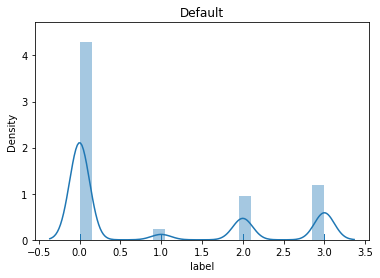

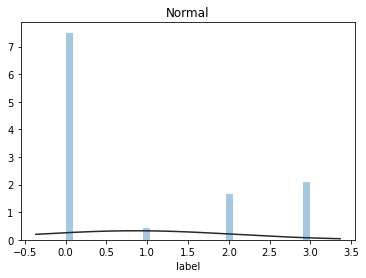

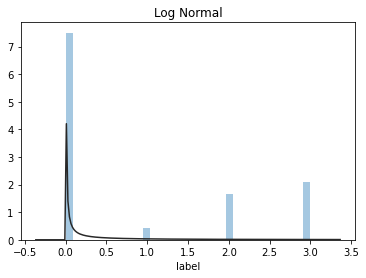

In [28]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['label']
plt.figure(1); plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 0.871005
Kurtosis: -1.009573


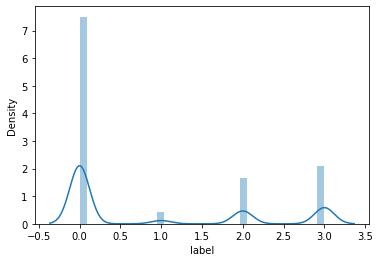

In [29]:
# 2）查看skewness and kurtosis
sns.distplot(Train_data['label']);
print("Skewness: %f" % Train_data['label'].skew())
print("Kurtosis: %f" % Train_data['label'].kurt())


In [30]:
Train_data.skew(), Train_data.kurt()

(id       0.000000
 label    0.871005
 dtype: float64, id      -1.200000
 label   -1.009573
 dtype: float64)

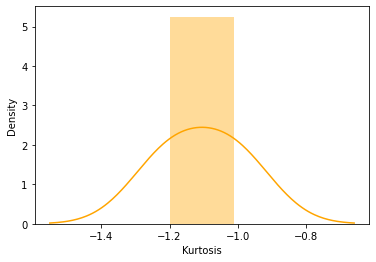

In [32]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtosis')

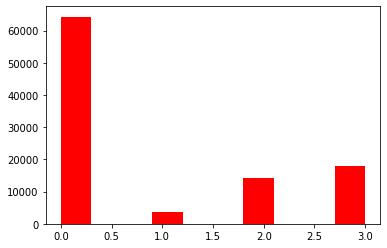

In [33]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['label'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()